# Module 1: Thao tác dữ liệu tín hiệu sinh học
## Bài 3: Khảo sát dữ liệu chuỗi bằng biểu đồ tuyến kí

### BS. Lê Ngọc Khả Nhi


# Khởi hành

Thân chào các bạn đồng nghiệp, đây là bài thực hành thứ 3 trong Module 1 về Thao tác trên dữ liệu tín hiệu sinh học (Biosignal data wrangling).

Trong 2 bài trước, chúng ta đã thực hiện lần lượt 2 công đoạn: tải dữ liệu thô, sau đó chọn mẫu và dán nhãn và lưu lại thành database cho một thí nghiệm khoa học. Bài này, chúng ta sẽ bàn về một công cụ đồ họa thống kê thiết yếu để khảo sát trực quan dữ liệu chuỗi, đó là biểu đồ tuyến kí.

Bài thực hành này kế thừa kết quả của bài thứ 2, lần trước chúng ta đã tạo ra 1 folder có tên là D_Respiratory trong thư mục hiện hành, bên trong có file DB_Respiratory.pickle chứa thông tin về 5 chuỗi dữ liệu của Flow_th, Abd_RIP, Tx_RIP, OEP và SpO2 lấy mẫu ở tần số 10Hz, và thông tin về các biến cố hô hấp.

Các bạn có thể đi tắt bằng cách tải file pickle này từ github của dự án:
https://github.com/taile2007/Biosignal-analysis/blob/master/Data%20wrangling-01-Importation/D_Respiratory.rar

Trong bài hôm nay, chúng ta sẽ dùng biểu đồ tuyến kí để khảo sát trực quan đặc tính của 5 kênh tín hiệu giữa các loại biến cố hô hấp khác nhau.

Code thực hành cho bài 3 này nằm trong module data_viz trong package module1 tại đây:
https://github.com/taile2007/Biosignal-analysis/tree/master/Data%20wrangling-01-Importation/module1

# Về biểu đồ tuyến kí

## Giới thiệu

Tuyến kí (Line graph hay line plot) là một dạng biểu đồ thống kê sử dụng đường liên tục để kết nối các điểm trong một chuỗi dữ liệu, nhằm trình bày sự biến thiên của một biến kết quả (Y) tùy theo một biến X khác. Biểu đồ tuyến kí có nguồn gốc rất lâu đời, thậm chí xuất hiện trước cả biểu đồ tán xạ. Vào năm 1801, biểu đồ tuyến kí được Playfair sử dụng hàng loạt trong quyển Commercial and Political Atlas.


## Liên hệ tự nhiên giữa lineplot và bio-signal

Trong thế giới thực, ta có thể gặp biểu đồ tuyến kí trong rất nhiều hình ảnh, thí dụ: vệt bánh xe trên con đường, làn khói sau động cơ máy bay, nét bút trên giấy... Trước khi có máy in và dữ liệu số hóa, thời xa xưa người ta đã ghi lại tín hiệu điện tâm đồ, hô hấp ký hoàn toàn cơ học và thủ công bằng một đầu kim trên cuộn giấy xoay tròn (kymograph), vì vậy có sự liên hệ tự nhiên giữa biểu đồ tuyến kì và tín hiệu sinh học.


## Yếu tố thời gian

Tuy việc nối các điểm rời rạc bằng nét vẽ là một động tác cơ bản trong hội họa, đường nét liên tục chỉ trở thành một biểu đồ tuyến kí đúng nghĩa khi cả 2 biến Y và X đều có ý nghĩa thứ bậc hoặc trình tự. Vì vậy, biểu đồ truyền đạt thông tin một cách tối ưu khi trục hoành X là thời gian.

Trên thực tế, yếu tố thời gian luôn hiện hữu và bao hàm trong nhiều đại lượng mà ta quan sát, thí dụ tuổi của bệnh nhân, nhịp tim/hô hấp.... Ý nghĩa, tính chất của thời gian, nhận thức về nó có thể thay đổi tùy theo bối cảnh và lĩnh vực khoa học. Tuy nhiên đặc tính phổ quát của thời gian bao gồm :

+ Tính liên tục : Thời gian được xem như một dòng chảy liên tục. Khoảng thời gian giữa 2 thời điểm bất kì có thể được chia nhỏ đến vô hạn. 

+ Tính khái quát: Chu kì hay khoảng thời gian là một khái niệm độc lập với vị trí quá khứ/hiện tại/tương lai. Khi ta phát biểu : thời gian trung bình của biến cố ngưng thở khi ngủ do tắc nghẽn là 15 giây, thì thời gian này mang ý nghĩa chung chung, không phân biệt vị trí quan sát ở ngày/tháng/năm nào, ở quá khứ hay trong tương lai.

+ Thời gian có tính thứ tự (trước/sau) : Ta không thể xáo trộn ngẫu nhiên thứ tự dữ liệu chuỗi thời gian, thứ tự quan sát phải theo 1 chiều trên thang đo thời gian.

+ Thời gian có tính chu kì : hầu hết những đại lượng sinh học như nhịp tim, hô hấp, ... có chu kì thay đổi đặc trưng, tương tự như huyết áp có chu kì thay đổi trong ngày hoặc sóng điện não thay đổi theo chu kì trong giấc ngủ. Một thủ thuật thường được dùng để xử lý dữ liệu chuỗi thời gian là phân tích chuỗi này thành những thành phần khác nhau gồm : khuynh hướng (trend), chu kì (season) và nhiễu (noise). 

+ Khả năng quy đổi : Ta có thể hoán chuyển thang đo thời gian thành chu kì dài hay ngắn tùy thích, từ năm/tháng/ngày cho đến giờ/phút/giây hay mili giây. 

+ Tính bão hòa : Trong một số trường hợp, ta chấp nhận xét thời điểm như một trạng thái mà không cần sự chính xác tuyệt đối. Lúc này, thời gian có tính chất bão hòa, mọi biến cố phát sinh hay giá trị được ghi nhận vào bất cứ thời điểm nào trong khoảng thời gian đang xét sẽ được dán nhãn giá trị như nhau. Tính chất này dùng khi dán nhãn các cửa sổ quan sát trong bài toán machine learning.


## Khác biệt giữa phân tích tín hiệu và thống kê thường quy

Trong môn Thống kê, Thời gian vừa có thể được xét như một biến số thứ tự hay liên tục (thang thời gian chính xác tuyệt đối đến mili giây), vừa có thể xem như biến định tính (trạng thái, hoàn cảnh, thời điểm). 

Tuy nhiên trong phân tích tín hiệu, đối tượng nghiên cứu không còn là con người hay cá thể, nhưng là bản thân tín hiệu vật lý/sinh học, với đơn vị quan sát là mỗi thời điểm lấy mẫu (1 điểm giá trị) trên chuỗi thời gian. Dữ liệu thường được lấy mẫu tự động, lặp lại và kéo dài nên vô cùng chính xác về chu kỳ và thời điểm. Tùy theo tần số lấy mẫu cao hay thấp, cỡ mẫu cho mỗi chuỗi có thể nhỏ hoặc lớn, thậm chí vô cùng lớn với hàng ngàn hay hàng triệu điểm giá trị). Lúc này, thời gian trở thành một biến số liên tục, biểu kiến và có độ chính xác tuyệt đối (đến mili giây). 

Dạng biểu đồ mặc định cho dữ liệu chuỗi là tuyến ký. Trục hoành chỉ thời gian, là một biến số liên tục với độ chính xác tuyệt đối. Ta cũng có thể hoán chuyển biến thời gian thành con số thứ tự cho mỗi điểm trong dữ liệu. Do thời gian thực sự được đo đạc, việc tính toán, lấy mẫu và hoán chuyển đơn vị phải được máy tính thực hiện, không nên làm thủ công.

# Thí dụ minh họa:

Trong thí nghiệm này, giả định Nhi muốn khảo sát trực quan đặc tính của 5 chuỗi tín hiệu trong các biến cố hô hấp khác nhau.

Trước hết Nhi import module data_viz

In [1]:
from module1.data_viz import *

Sau đó khởi tạo 1 instance của class Data_viz:

In [2]:
pat_db = Data_viz(patient_id = 'Respiratory')

pat_db

Đây là data base cho pack dữ liệu Respiratory

Bảng mã hóa các label cho biến cố hô hấp như sau:

In [3]:
pat_db.resp_code

{'FL': 1, 'RERA': 2, 'OH': 3, 'CH': 4, 'OA': 5, 'CA': 6, 'MA': 8}

Sử dụng method plot_respir_evt để khảo sát biến cố giảm thở do tắc nghẽn (Obstructive hypopnea) thứ 2 trong danh sách;

Lọc tín hiệu ở tần số hô hấp, fs = 5


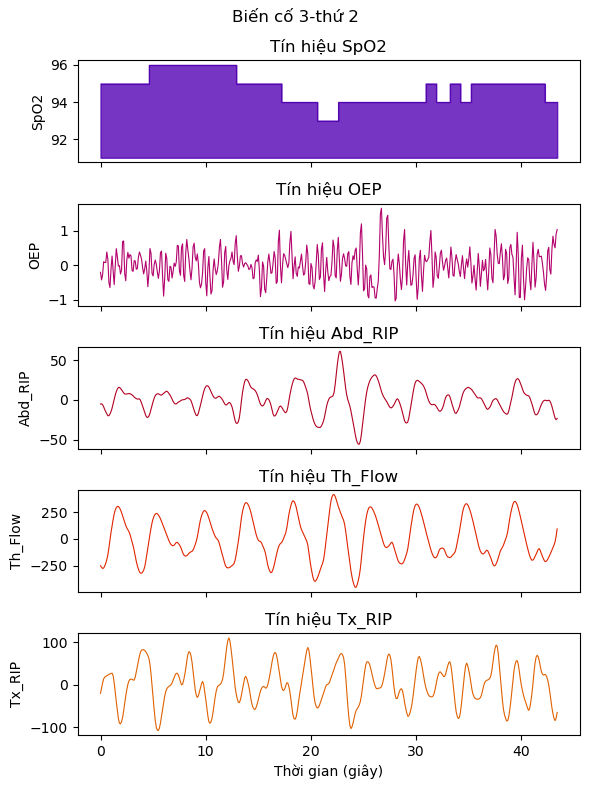

In [4]:
pat_db.plot_respir_evt(target = 3, evt_id = 2, pre = 10., post = 10.)

Trong biểu đồ này, ta chú ý có 2 dạng lineplot, dạng liên tục cho các kênh tín hiệu số liên tục, và dạng bậc thang (stepplot) cho kênh tín hiệu không liên tục, như SpO2.

Như ta thấy, lineplot cho phép cảm nhận về chu kì hô hấp, biên độ của mỗi tín hiệu

Một thí dụ khác sau đây, trong cơn ngừng thở (Apnea, mức độ tắc nghẽn nặng hơn so với giảm thở), ta có thể cảm nhận rõ sự khác biệt về suy giảm biên độ, gần như bị ép dẹt; tương ứng với sự suy giảm của SpO2 (mất bão hòa oxy máu).

Lọc tín hiệu ở tần số hô hấp, fs = 5


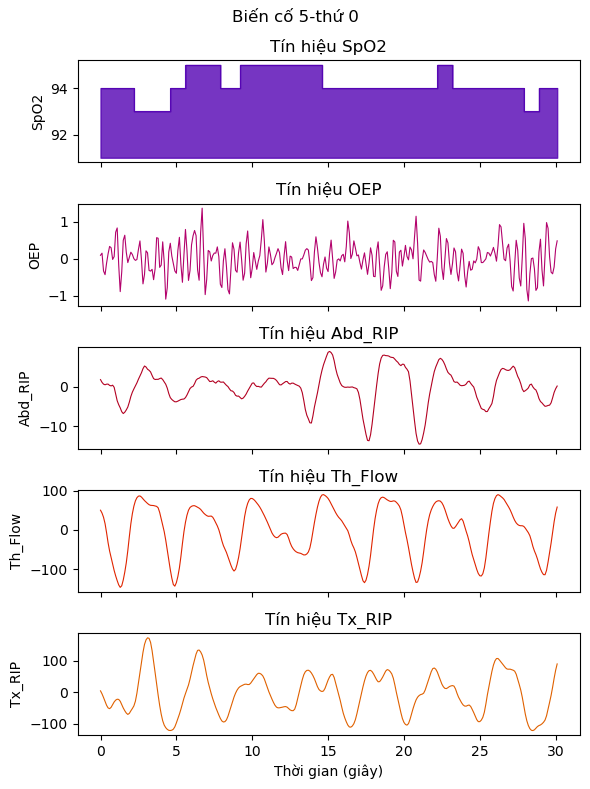

In [8]:
pat_db.plot_respir_evt(target = 5, evt_id = 0, pre = 10, post = 10)

Ta khảo sát tiếp 1 cơn ngưng thở trung ương (central apnea), do không có sự tắc nghẽn cơ học, không có sự gắng sức hay tăng áp suất hô hấp ở ngực và bụng.

Lọc tín hiệu ở tần số hô hấp, fs = 5


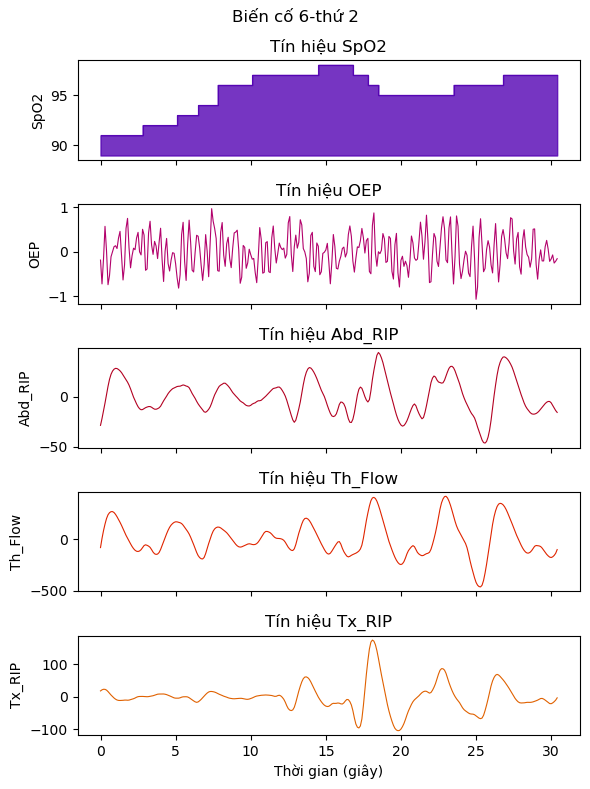

In [10]:
pat_db.plot_respir_evt(target = 6, evt_id = 2, pre = 10, post = 10)

Cuối cùng, một thí dụ cho biến cố RERA, biến cố này thường kéo dài hơn và có biên độ dao động thấp hơn, gần giống như hô hấp bình thường.
Chú ý rằng các ngưỡng giới hạn thang đo trục hoành và trục tung, sự xuất hiện giá trị quá cao hay quá thấp đột ngột, thí dụ do nhiễu hay biến cố vi thức... có thể thay đổi hình ảnh mà ta quan sát được.

Lọc tín hiệu ở tần số hô hấp, fs = 5


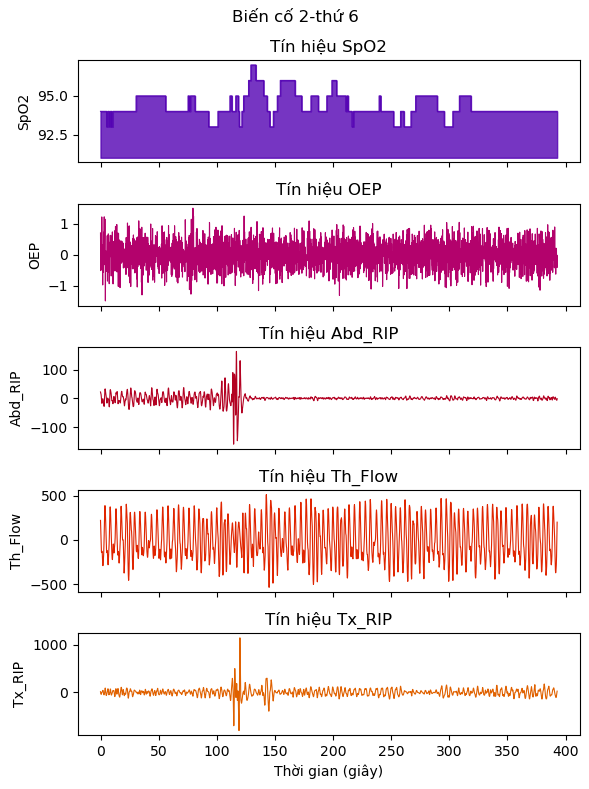

In [7]:
pat_db.plot_respir_evt(target = 2, evt_id = 6, pre = 10, post = 10)

# Phân tích chuỗi tín hiệu thành 3 thành phần

Tiếp theo, ta dùng method decompose_signal để phân tích chuỗi 'OEP' - áp lực thực quản trong 1 cơn ngưng thở trung ương, thành 3 thành phần Seasonal, Trend và Noise. Đây là 1 thủ thuật cơ bản trong phân tích chuỗi thời gian để khử nhiễu và phát hiện khuynh hướng, chu kì.

Lọc tín hiệu ở tần số hô hấp, fs = 5


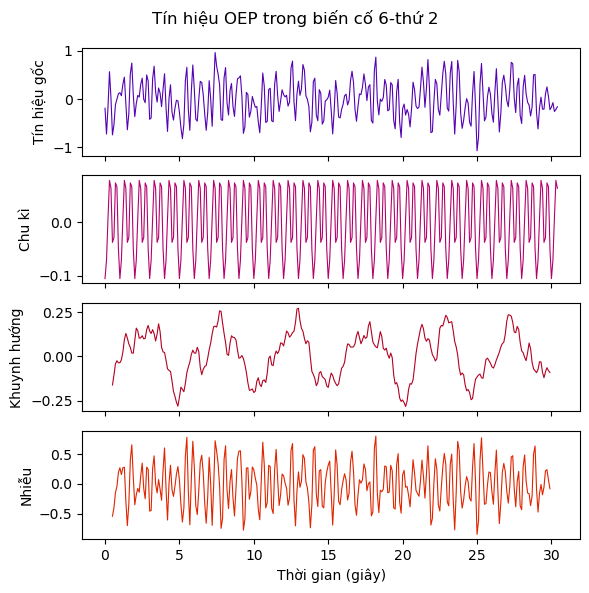

In [11]:
pat_db.decompose_signal(target = 5, evt_id = 2, pre = 10., post = 10., chan = 'OEP')

# Lợi thế của biểu đồ tuyến kí

So với cách tiếp cận dữ liệu chuỗi thời gian bằng bảng và con số, đồ họa thống kê có ưu thế tuyệt đối. Những ưu điểm này bao gồm :

6 Chỉ có biểu đồ tuyến kí cho phép khảo sát tổng quát và trọn vẹn dữ liệu chuỗi thời gian. Khác với nghiên cứu mà đối tượng quan sát là cá thể, dữ liệu chuỗi thời gian không thể được phân tích ở cấp độ đơn vị quan sát, một cách ngẫu nhiên, nhưng phải khảo sát đồng thời toàn bộ dữ liệu (tất cả các thời điểm, theo thứ tự). 

Khi dùng cho chuỗi thời gian, biểu đồ sẽ chuyển dữ liệu thành một câu chuyện có ý nghĩa - diễn tiến của Y theo thời gian.

+ Không có công cụ nào khác làm việc này tốt hơn biểu đồ tuyến kí. Những trị số thống kê mô tả hoặc biểu đồ phân bố (histogram, density plot) đều kém hiệu quả cho dữ liệu có tính chu kì, phân bố nhiều mode, có khả năng phát sinh ngẫu nhiên những thay đổi bất thường cả về khuynh hướng, cường độ và phương sai… và quan trọng nhất, khi dữ liệu có cỡ mẫu cực lớn. Với tín hiệu sinh học ngay cả ở tần số 10-20 Hz, ta chắc chắn không thể đọc vài ngàn con số trên bảng, cũng không thể dùng thống kê mô tả hay histogram. Nhưng với biểu đồ tuyến kí, ta có thể nhìn thấy toàn bộ dữ liệu trong tầm mắt, nhận diện được chu kỳ, khuynh hướng thay đổi… Nói cách khác, dữ liệu tín hiệu sinh học chỉ kể được câu chuyện đầy đủ ý nghĩa bằng đồ họa.


+ Biểu đồ tuyến kí là công cụ duy nhất cho phép trình bày tính liên tục của thời gian. Thật vậy, ngay cả khi ta có mục tiêu khảo sát thời gian như một biến số liên tục, các phương pháp lấy mẫu chỉ cho phép ta ghi nhận giá trị tại từng thời điểm rời rạc, nhất là tín hiệu digital. Mỗi hàng trong dữ liệu thô chỉ có thể trình bày được 1 thời điểm/trạng thái rời rạc. Vì mỗi hàng phải tách biệt với những hàng khác nên thời gian trên bảng không bao giờ liên tục. Ngược lại, biểu đồ tuyến kí kết nối những thời điểm rời rạc lại với nhau và gây ra cảm giác về một sự biến thiên liên tục.


+ Một ưu điểm khác của biểu đồ tuyến kí là nó cho phép suy diễn kết quả tại bất cứ vị trí giao điểm nào trên thang đo liên tục của X và Y, thậm chí nó có thể dùng để dự báo cho tương lai, ngoại suy hay hồi suy. 


+ Biểu đồ tuyến kí còn là phương tiện hiệu quả nhất để phát hiện thay đổi bất thường trên chuỗi thời gian, phát hiện hành vi đặc biệt của tín hiệu hoặc so sánh giữa các trạng thái khác nhau. Đây là một câu hỏi rất phức tạp vì tính chất « bất thường » có thể được biểu hiện ra theo nhiều cách: thí dụ : (a) Biến đổi ngẫu nhiên giá trị trung bình/trung vị nhưng biên độ dao động không đổi (thí dụ : tần số hô hấp), (b) Biến đổi khuynh hướng trung tâm theo một quy luật có tính chu kì (thi dụ nhiệt độ/độ ẩm quanh năm, thay đổi huyết áp trong ngày), (c) Chỉ thay đổi ngẫu nhiên về biên độ (phương sai) nhưng trung bình không đổi (thí dụ tín hiệu về lưu lượng hô hấp), (d) Thay đổi cả về trung bình và biên độ dao động (phương sai), thí dụ nhật kí theo dõi peakflow, FENO ở bệnh nhân hen, (e) Chỉ thay đổi về chu kì : thí dụ hàm y=sin(x) và y=sin(x/2).


+ Do tính phức tạp này. Trực giác của bạn chính là giải pháp nhạy cảm nhất để phát hiện sự biến chuyển “bất thường”. Dù bạn không tin tưởng tuyệt đối vào trực giác và sử dụng các thuật toán phân cụm hay tính toán các metrics khác nhau, thì kết quả tối ưu vẫn chỉ có thể được biểu diễn bằng đồ họa thay vì con số.

Bài thực hành đến đây là hết. Hẹn gặp lại các bạn lần tới.